# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [2]:
#Import necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk


In [3]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from xgboost import XGBClassifier
import string

In [4]:
# Creating empty lists at first to hold categories and reviews
empty_lists_labels = []
empty_lists_messages = []

# performing initialization 
with open("stsa-train.txt", "r") as file:
    for line in file:
#         Parsing the line's categories and reviews out separately
        labels, messages = line.split(' ', 1)
        
#         Completing the necessary lists with both the categories and reviews.

        empty_lists_labels.append(int(labels))
        empty_lists_messages.append(messages.strip())  # Elimination of leading and trailing whitespaces in the expression

# Constructing a (review_df)DataFrame 
review_df = pd.DataFrame({'Category': categories, 'Review': review})

# dataframe heading display

review_df.head()


,Category,Review
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [5]:
review_df.isnull().sum().sum()


0

In [6]:
# (preprocess_text)Function to perform text cleaning

def preprocess_text(text):
    # Remove punctuation and special characters
    cleaned_text = ''.join([char for char in text if char not in string.punctuation])
    # Remove numbers from text
    cleaned_text = ''.join([char for char in cleaned_text if not char.isdigit()])
    # Tokenize the text
    tokens = nltk.word_tokenize(cleaned_text)
    # Remove stopwords from text
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    # Lowercase all words
    tokens = [word.lower() for word in tokens]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Joining the words back into a cleaned sentence
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [7]:
df['Review'] = df['Review'].apply(preprocess_text)

In [8]:
df.head()

,Category,Review
0,1,stir funni final transport reimagin beauti bea...
1,0,appar reassembl cuttingroom floor given daytim...
2,0,presum audienc wo nt sit still sociolog lesson...
3,1,visual stun rumin love memori histori war art ...
4,1,jonathan parker bartlebi beallendal modernoffi...


In [9]:
#transfomring cleaned text into  list 
cleanedReview = df['Review'].tolist()
cleanedReview[1:10]

['appar reassembl cuttingroom floor given daytim soap',
 'presum audienc wo nt sit still sociolog lesson howev entertainingli present trot convent sciencefict element bugey monster futurist woman skimpi cloth',
 'visual stun rumin love memori histori war art commerc',
 'jonathan parker bartlebi beallendal modernoffic anomi film',
 'campanella get tone right funni middl sad middl hope',
 'fan film uniniti play better video sound turn',
 'béart berl superb huppert magnific',
 'littl le extrem past longer exposit sequenc fewer gag break tedium',
 'film strictli routin']

In [10]:
# creating tfidf_vectorizer
tfidfvector = TfidfVectorizer()
tfidfvector

TfidfVectorizer()

In [11]:
# Making the textual data numerically observable
X = tfidfvector.fit_transform(cleanedReview)
# Target  feature
y = df['Category']

In [12]:
# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Creating instances of each classifier
# Multinomial Naive Bayes
nb_classifier = MultinomialNB()

# Support Vector Machine
svm_classifier = SVC()

# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()

# Decision Tree
dt_classifier = DecisionTreeClassifier()

# Random Forest
rf_classifier = RandomForestClassifier()

# XGBoost
xgb_classifier = XGBClassifier()


In [14]:
# Dictionary creation for classifiers
trained_classifiers = {
    "Naive Bayes": nb_classifier,
    "Support Vector Machine": svm_classifier,
    "K-Nearest Neighbors": knn_classifier,
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    "XGBoost": xgb_classifier,
}


In [15]:
# Creating a dictionary to store results
cv_results = {}

# Setting up Cross-Validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)


In [16]:
for name, classify in trained_classifiers.items():
    
    scores = cross_val_score(classifier, X_train, y_train, cv=kf, scoring='accuracy')
    average_accuracy = np.mean(scores)
    classify.fit(X_train, y_train)# X_train and y_train classifier fitting
    y_pred = classify.predict(X_val)# predictions based on the validation data (X_val)
    
    #Using the validation data to calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # preserving the results for later use in the dictionary
    dictionary[name] = {
        'Average Accuracy (CV)': average_accuracy,
        'Accuracy (Validation data)': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }

In [95]:
dictionary

{'MultinomialNB': {'Average Accuracy (CV)': 0.7714984234337156,
  'Accuracy (Validation data)': 0.7926300578034682,
  'Precision': 0.7566265060240964,
  'Recall': 0.8807854137447405,
  'F1 Score': 0.8139987038237201},
 'SVM': {'Average Accuracy (CV)': 0.7722165281594975,
  'Accuracy (Validation data)': 0.8041907514450867,
  'Precision': 0.7862694300518135,
  'Recall': 0.8513323983169705,
  'F1 Score': 0.8175084175084175},
 'KNN': {'Average Accuracy (CV)': 0.5698980291289392,
  'Accuracy (Validation data)': 0.5303468208092486,
  'Precision': 0.5233853006681515,
  'Recall': 0.9887798036465638,
  'F1 Score': 0.6844660194174759},
 'Decision Tree': {'Average Accuracy (CV)': 0.6519095057481019,
  'Accuracy (Validation data)': 0.680635838150289,
  'Precision': 0.6739409499358151,
  'Recall': 0.7363253856942497,
  'F1 Score': 0.7037533512064343},
 'Random Forest': {'Average Accuracy (CV)': 0.7308465149072012,
  'Accuracy (Validation data)': 0.7528901734104047,
  'Precision': 0.7363057324840764

In [96]:
for name, metrics in dictionary.items():
    print("Evaluation for {}:".format(name))
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    


Evaluation for MultinomialNB:
Average Accuracy (CV): 0.7714984234337156
Accuracy (Validation data): 0.7926300578034682
Precision: 0.7566265060240964
Recall: 0.8807854137447405
F1 Score: 0.8139987038237201
Evaluation for SVM:
Average Accuracy (CV): 0.7722165281594975
Accuracy (Validation data): 0.8041907514450867
Precision: 0.7862694300518135
Recall: 0.8513323983169705
F1 Score: 0.8175084175084175
Evaluation for KNN:
Average Accuracy (CV): 0.5698980291289392
Accuracy (Validation data): 0.5303468208092486
Precision: 0.5233853006681515
Recall: 0.9887798036465638
F1 Score: 0.6844660194174759
Evaluation for Decision Tree:
Average Accuracy (CV): 0.6519095057481019
Accuracy (Validation data): 0.680635838150289
Precision: 0.6739409499358151
Recall: 0.7363253856942497
F1 Score: 0.7037533512064343
Evaluation for Random Forest:
Average Accuracy (CV): 0.7308465149072012
Accuracy (Validation data): 0.7528901734104047
Precision: 0.7363057324840764
Recall: 0.8106591865357644
F1 Score: 0.7716955941255

## Evaluating Model on Test Data

In [97]:
# Creating empty lists at first to hold categories and reviews
empty_lists_labels = []
empty_lists_messages = []


# performing initialization 
with open("stsa-test.txt", "r") as file:
    for line in file:
        # Parsing the line's label and text out separately
        labels, messages = line.split(' ', 1)
        
        # Completing the necessary lists with both the label and the content.

        empty_lists_labels.append(int(labels))
        empty_lists_messages.append(messages.strip())  # Elimination of leading and trailing whitespaces in the expression

# Constructing a DataFrame from the lists
reviewtest_df = pd.DataFrame({'Category': empty_lists_labels, 'Reviews': empty_lists_messages})

# Displaying the head of the DataFrame
reviewtest_df.head()


,Category,Reviews
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [99]:
#creating new col for cleaned test
reviewtest_df['Reviews'] = reviewtest_df['Reviews'].apply(preprocess_text)

In [100]:
reviewtest_df.head()

,Category,Reviews
0,1,stir funni final transport reimagin beauti bea...
1,0,appar reassembl cuttingroom floor given daytim...
2,0,presum audienc wo nt sit still sociolog lesson...
3,1,visual stun rumin love memori histori war art ...
4,1,jonathan parker bartlebi beallendal modernoffi...


In [101]:
# transform into a list of clarified text 
cleanedText= reviewtest_df['Reviews'].tolist()
cleanedText[1:10]

['appar reassembl cuttingroom floor given daytim soap',
 'presum audienc wo nt sit still sociolog lesson howev entertainingli present trot convent sciencefict element bugey monster futurist woman skimpi cloth',
 'visual stun rumin love memori histori war art commerc',
 'jonathan parker bartlebi beallendal modernoffic anomi film',
 'campanella get tone right funni middl sad middl hope',
 'fan film uniniti play better video sound turn',
 'béart berl superb huppert magnific',
 'littl le extrem past longer exposit sequenc fewer gag break tedium',
 'film strictli routin']

In [102]:
# Transforming the text data into numerical features
X_valid = tfidf_vectorizer.transform(cleanedText)

y_valid = reviewtest_df['Category']

In [103]:
len(y_valid)

8741

In [104]:
# creating a dictionary to hold the outcomes
results_dictionary = {}
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, classify in classifiers.items():
    
    scores = cross_val_score(classify, X_train, y_train, cv=kf, scoring='accuracy')
    average_accuracy = np.mean(scores)
    
    # X_train and y_train classifier fitting
    classify.fit(X_train, y_train)
    
    # Making assumptions based on the X_val validation data
    y_pred = classify.predict(X_val)
    
    # Calculation of evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Storing the findings in the dictionary for future reference
    dictionary[name] = {
        'Average Accuracy (CV)': average_accuracy,
        'Accuracy (Validation data)': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }

In [105]:
dictionary

{'MultinomialNB': {'Average Accuracy (CV)': 0.7714984234337156,
  'Accuracy (Validation data)': 0.882507722228578,
  'Precision': 0.8558907460252752,
  'Recall': 0.9291878734233238,
  'F1 Score': 0.8910344827586206},
 'SVM': {'Average Accuracy (CV)': 0.7722165281594975,
  'Accuracy (Validation data)': 0.9206040498798764,
  'Precision': 0.9117330462863293,
  'Recall': 0.9371542376631998,
  'F1 Score': 0.9242688782191182},
 'KNN': {'Average Accuracy (CV)': 0.5698980291289392,
  'Accuracy (Validation data)': 0.8217595240819128,
  'Precision': 0.7475338572145126,
  'Recall': 0.9893781810134986,
  'F1 Score': 0.8516190476190476},
 'Decision Tree': {'Average Accuracy (CV)': 0.649919376423969,
  'Accuracy (Validation data)': 0.8735842580940396,
  'Precision': 0.8648995297135528,
  'Recall': 0.8953308254038504,
  'F1 Score': 0.8798521256931608},
 'Random Forest': {'Average Accuracy (CV)': 0.7317490419830136,
  'Accuracy (Validation data)': 0.9064180299736873,
  'Precision': 0.8983853606027987,

In [106]:
for name, metrics in dictionary.items():
    print("Evaluation measurement for the {}:".format(classifier_name))
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    


Evaluation measurement for the MultinomialNB:
Average Accuracy (CV): 0.7714984234337156
Accuracy (Validation data): 0.882507722228578
Precision: 0.8558907460252752
Recall: 0.9291878734233238
F1 Score: 0.8910344827586206
Evaluation measurement for the SVM:
Average Accuracy (CV): 0.7722165281594975
Accuracy (Validation data): 0.9206040498798764
Precision: 0.9117330462863293
Recall: 0.9371542376631998
F1 Score: 0.9242688782191182
Evaluation measurement for the KNN:
Average Accuracy (CV): 0.5698980291289392
Accuracy (Validation data): 0.8217595240819128
Precision: 0.7475338572145126
Recall: 0.9893781810134986
F1 Score: 0.8516190476190476
Evaluation measurement for the Decision Tree:
Average Accuracy (CV): 0.649919376423969
Accuracy (Validation data): 0.8735842580940396
Precision: 0.8648995297135528
Recall: 0.8953308254038504
F1 Score: 0.8798521256931608
Evaluation measurement for the Random Forest:
Average Accuracy (CV): 0.7317490419830136
Accuracy (Validation data): 0.9064180299736873
Pre

## Word2Vec Model

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
from gensim.models import Word2Vec

In [109]:
# Implementing the Word2Vec model's training.
word2vecModel = Word2Vec(sentences=[t.split() for t in df['Review']], vector_size=100, window=5, min_count=1, workers=4)

In [110]:
#Textual data may be transformed into numerical properties using Word2Vec.
X_train_word2vec = np.array([np.mean([word2vecModel.wv[w] for w in text.split() if w in word2vecModel.wv] or [np.zeros(100)], axis=0) for t in X_train])
X_valid_word2vec = np.array([np.mean([word2vecModel.wv[w] for w in text.split() if w in word2vecModel.wv] or [np.zeros(100)], axis=0) for t in X_valid])


In [111]:
#initialised simple neural network classifier 
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_classifier.fit(X_train_word2vec, y_train)


MLPClassifier(max_iter=300, random_state=42)

In [112]:
# validation data evaluation
y_pred_nn = nn_classifier.predict(X_valid_word2vec)

In [113]:
accuracy_neural_network = accuracy_score(y_val, y_pred_nn)
precision_neural_network = precision_score(y_val, y_pred_nn)
recall_neural_network = recall_score(y_val,y_pred_nn)
f1_neural_network = f1_score(y_val, y_pred_nn)

print(f"Word2Vec Neural Network Evaluation Metrics:")
print(f"Accuracy: {accuracy_neural_network}")
print(f"Precision: {precision_neural_network}")
print(f"Recall: {recall_neural_network}")
print(f"F1 Score: {f1_neural_network}")


Word2Vec Neural Network Evaluation Metrics:
Accuracy: 0.516988902871525
Precision: 0.516988902871525
Recall: 1.0
F1 Score: 0.6815987933634992


## Test Data

In [114]:
reviewtest_df.head(2)

,Category,Reviews
0,1,stir funni final transport reimagin beauti bea...
1,0,appar reassembl cuttingroom floor given daytim...


In [115]:
len(reviewtest_df)

8741

In [117]:
word2vec_model_1 = Word2Vec(sentences=[t.split() for t in df['Review']], vector_size=100, window=5, min_count=1, workers=4)

In [118]:
#conversion into numerical 
X_train_word2vec = np.array([np.mean([word2vec_model.wv[w] for w in text.split() if w in word2vec_model.wv] or [np.zeros(100)], axis=0) for t in X_train])
X_test_word2vec = np.array([np.mean([word2vec_model.wv[w] for w in text.split() if w in word2vec_model.wv] or [np.zeros(100)], axis=0) for t in X_valid])

In [119]:
#initializing a simple neural network 
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_classifier.fit(X_train_word2vec, y_train)


MLPClassifier(max_iter=300, random_state=42)

In [120]:
# validation data evaluation
y_pred_nn= neural_network_classifier.predict(X_test_word2vec)

In [122]:
# Target  column
y_val = reviewtest_df['Category']
# Printing the  evaluation metrics
accuracy_nn = accuracy_score(y_val, y_pred_nn)
precision_nn = precision_score(y_val, y_pred_nn)
recall_nn = recall_score(y_val, y_pred_nn)
f1_nn = f1_score(y_val, y_pred_nn)


print(f"Accuracy: {accuracy_nn}")
print(f"Precision: {precision_nn}")
print(f"Recall: {recall_nn}")
print(f"F1 Score: {f1_nn}")


Accuracy: 0.516988902871525
Precision: 0.516988902871525
Recall: 1.0
F1 Score: 0.6815987933634992


## BERT Model

In [18]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch


In [28]:
# Fine-tuning a BERT-based sequence classification model

# Set the maximum sequence length
max_seq_length = 128  

# Load the pre-trained BERT model and tokenizer
fine_tuned_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
fine_tuned_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the text data for training the BERT model
X_train_tokens = train_df['Reviews'].apply(lambda x: fine_tuned_tokenizer.encode(x, add_special_tokens=True))
X_train_tokens = pad_sequences(X_train_tokens, maxlen=max_seq_length, dtype="long", value=0, truncating="post", padding="post")
X_train_tokens = torch.tensor(X_train_tokens)
y_train_labels = torch.tensor(train_df['Category'].values)

# Create a DataLoader for training the BERT model
train_data = TensorDataset(X_train_tokens, y_train_labels)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)

# Set up optimizer and loss function
optimizer = AdamW(fine_tuned_model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

# Train the model
num_epochs = 3  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
fine_tuned_model.to(device)

for epoch in range(num_epochs):
    fine_tuned_model.train()
    total_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = fine_tuned_model(inputs, labels=labels)
        loss = criterion(outputs.logits, labels)
        
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {avg_loss}")

# Save the fine-tuned model
fine_tuned_model.save_pretrained('fine_tuned_bert_model')
fine_tuned_tokenizer.save_pretrained('fine_tuned_bert_model')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/mounicatamalampudi/anaconda3/envs/tf/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Epoch 1/3, Average Loss: 0.7011369400707184
Epoch 2/3, Average Loss: 0.7026241328094077
Epoch 3/3, Average Loss: 0.7054131092981157


('fine_tuned_bert_model/tokenizer_config.json',
 'fine_tuned_bert_model/special_tokens_map.json',
 'fine_tuned_bert_model/vocab.txt',
 'fine_tuned_bert_model/added_tokens.json')

In [124]:
model.eval()

with torch.no_grad():
    outputs = model(X_valid_tokens)
    predictions = torch.argmax(outputs.logits, dim=1)

    accuracy = accuracy_score(y_valid.cpu().numpy(), predictions.cpu().numpy())
precision = precision_score(y_valid.cpu().numpy(), predictions.cpu().numpy())
recall = recall_score(y_valid.cpu().numpy(), predictions.cpu().numpy())
f1 = f1_score(y_valid.cpu().numpy(), predictions.cpu().numpy())

print(f"Bert Evaluation Metrics:")
print(f"Accuracy of the Bert: {accuracy:.4f}")
print(f"Precision of the Bert: {precision:.4f}")
print(f"Recall of the Bert: {recall:.4f}")
print(f"F1 Score of the Bert: {f1:.4f}")

Bert Evaluation Metrics:
Accuracy of the Bert: 0.5325
Precision of the Bert: 0.5325
Recall of the Bert: 1.0
F1 Score of the Bert: 0.6949429037520392


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [62]:
df= pd.read_csv("mve_review.csv")
df.head()

,Movie Reviews
0,One of the most anticipated films of the year ...
1,You'll have to have your wits about you and yo...
2,I'm a big fan of Nolan's work so was really lo...
3,"""Oppenheimer"" is a biographical thriller film ..."
4,This movie is just... wow! I don't think I hav...


In [63]:
# Creating a function to handle the preprocessing and cleaning of a review.
def text_cleaning_and_preprocessing(text):
    # Remove punctuation marks and special characters.
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Exclude numerical characters.
    text = ''.join([char for char in text if not char.isdigit()])
    
    # Tokenize the text into individual words.
    words = nltk.word_tokenize(text)
    
    # Remove stop words.
    words = [w for w in words if w.lower() not in stopwords.words('english')]
    
    # Convert all words to lowercase.
    words = [w.lower() for w in words]
    
    # Stemming words to their root form.
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Lemmatization to reduce words to their base form.
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    # Join the cleaned words to form a refined sentence.
    cleaned_text = ' '.join(words)
    
    return cleaned_text

df['Movie Reviews'] = df['Movie Reviews'].apply(text_cleaning_and_preprocessing)


### Importing necessary libraries

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

### Initializing the TF-IDF vectorizer

In [67]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)


In [68]:
reviews_vectorized = vectorizer.fit_transform(df['Movie Reviews'])

###  Standardize the vectorized features

In [69]:
scaler = StandardScaler()
scaled_reviews = scaler.fit_transform(reviews_vectorized.toarray())

### Apply K-means clustering

In [70]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_reviews)


/Users/mounicatamalampudi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Apply DBSCAN clustering

In [71]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_reviews)

### Apply Hierarchical clustering

In [72]:
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_reviews)

### Visualize the clusters

/Users/mounicatamalampudi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


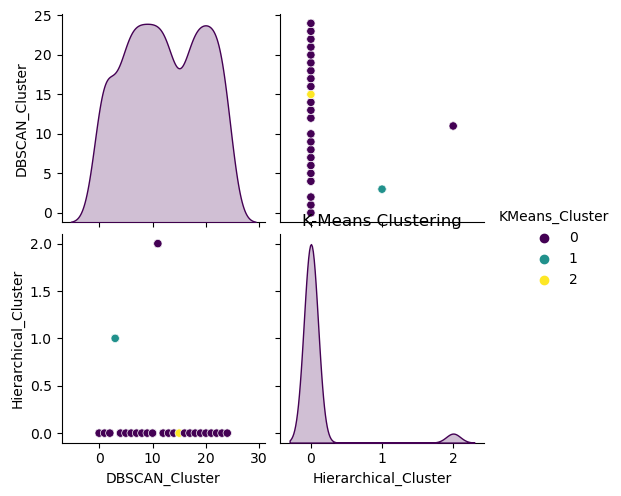

/Users/mounicatamalampudi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


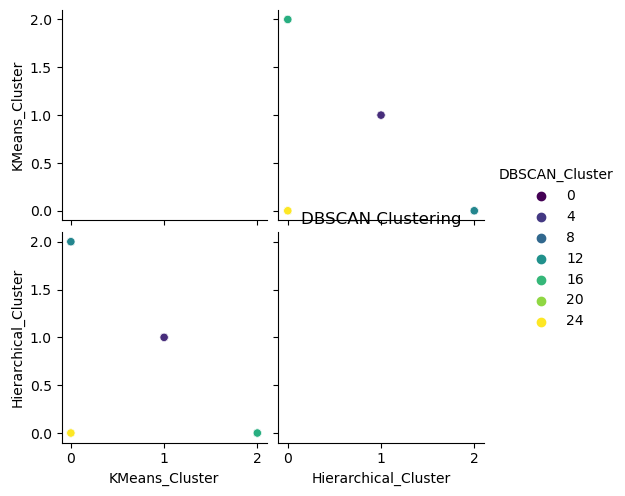

/Users/mounicatamalampudi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


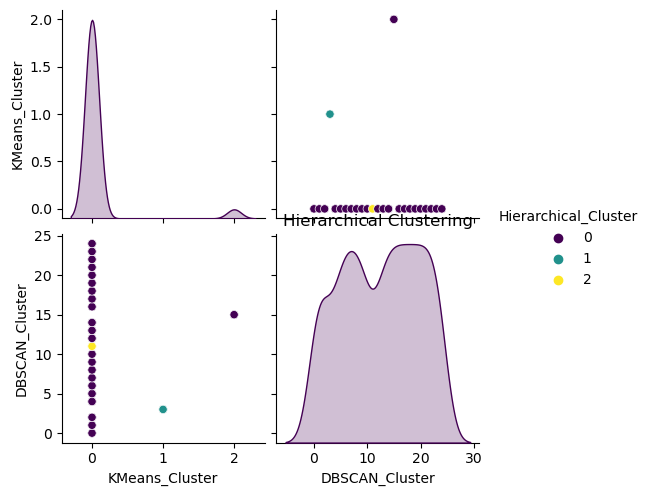

In [73]:
sns.pairplot(df, hue='KMeans_Cluster', palette='viridis', diag_kind='kde')
plt.title('K-Means Clustering')
plt.show()

sns.pairplot(df, hue='DBSCAN_Cluster', palette='viridis', diag_kind='kde')
plt.title('DBSCAN Clustering')
plt.show()

sns.pairplot(df, hue='Hierarchical_Cluster', palette='viridis', diag_kind='kde')
plt.title('Hierarchical Clustering')
plt.show()

In [157]:
from sklearn.metrics import silhouette_score

# Evaluate Silhouette Score for K-means clustering
silhouette_kmeans = silhouette_score(scaled_reviews, df['KMeans_Cluster'])
print(f"Silhouette Score for K-means Clustering: {silhouette_kmeans}")

# Evaluate Silhouette Score for DBSCAN clustering
silhouette_dbscan = silhouette_score(scaled_reviews, df['DBSCAN_Cluster'])
print(f"Silhouette Score for DBSCAN Clustering: {silhouette_dbscan}")

# Evaluate Silhouette Score for Hierarchical clustering
silhouette_hierarchical = silhouette_score(scaled_reviews, df['Hierarchical_Cluster'])
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}")


Silhouette Score for K-means Clustering: 0.17504657801613116
Silhouette Score for DBSCAN Clustering: 0.9999999556515496
Silhouette Score for Hierarchical Clustering: 0.42821463148597705


### Word2vec

/Users/mounicatamalampudi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


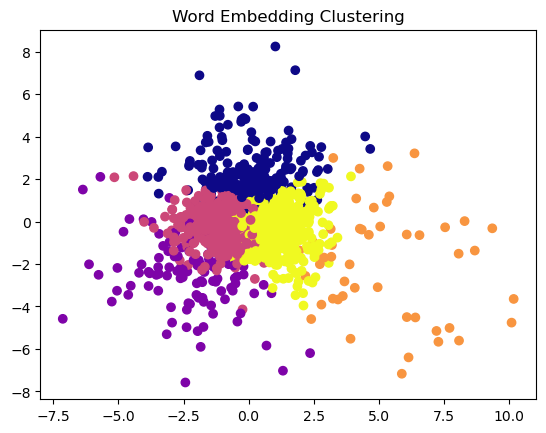

In [79]:
# Splitting the preprocessed movie reviews into individual words
tokenized_text = df['Movie Reviews'].apply(lambda x: x.split())

# Train the Word Embedding model
embedding_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Obtain word vectors from the Word Embedding model
word_vectors = embedding_model.wv

# Apply KMeans clustering to group word vectors
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(word_vectors.vectors)

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors.vectors)

# Visualize clustered word vectors
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='plasma')
plt.title('Word Embedding Clustering')
plt.show()


In [87]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the given cluster labels
silhouette_avg_score = silhouette_score(word_vectors.vectors, clusters)
print(f"Silhouette Score: {silhouette_avg_score}")


Silhouette Score: 0.009088762104511261


### BERT Clustering

In [84]:
import numpy as np
from transformers import BertTokenizer, BertModel
import torch


/Users/mounicatamalampudi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


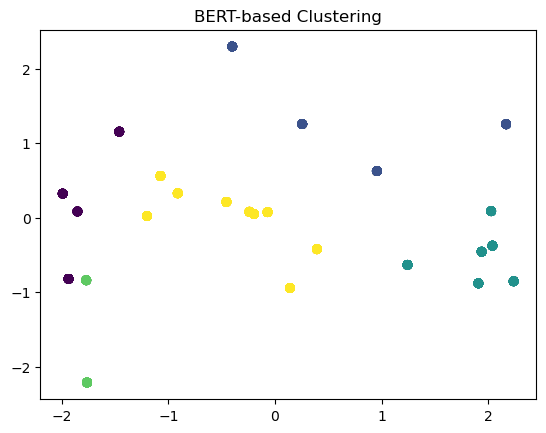

In [85]:
# BERT-based Clustering
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

tokenized_data_bert = df['Movie Reviews'].apply(lambda text: tokenizer_bert(text, return_tensors='pt', truncation=True, padding=True))
bert_embeddings_data = tokenized_data_bert.apply(lambda tokenized_text: model_bert(**tokenized_text).last_hidden_state.mean(dim=1).detach().numpy())

# Convert BERT embeddings to a matrix
bert_matrix_data = np.array(bert_embeddings_data.tolist())

# Reshape the matrix by flattening the sequence dimension
num_sequences_bert, sequence_length_bert, embedding_size_bert = bert_matrix_data.shape
reshaped_bert_matrix_data = bert_matrix_data.reshape(num_sequences_bert, sequence_length_bert * embedding_size_bert)

# KMeans clustering for BERT embeddings
kmeans_bert_embeddings = KMeans(n_clusters=5, random_state=42)
clusters_bert_embeddings = kmeans_bert_embeddings.fit_predict(reshaped_bert_matrix_data)

# PCA for BERT embeddings
pca_bert_embeddings = PCA(n_components=2)
pca_result_bert_embeddings = pca_bert_embeddings.fit_transform(reshaped_bert_matrix_data)

# Visualize BERT clusters
plt.scatter(pca_result_bert_embeddings[:, 0], pca_result_bert_embeddings[:, 1], c=clusters_bert_embeddings, cmap='viridis')
plt.title('BERT-based Clustering')
plt.show()


In [86]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score for clusters obtained using BERT embeddings
average_silhouette_bert = silhouette_score(reshaped_bert_matrix_data, clusters_bert_embeddings )

print(f"Silhouette Score for Clustering with BERT Embeddings: {average_silhouette_bert:.4f}")


Silhouette Score for Clustering with BERT Embeddings: 0.2937


In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [89]:
#You can write you answer here. (No code needed)

Within each clustering approach, the silhouette scores offer insights on the cohesiveness and separation of the clusters that have been created. A higher silhouette score suggests that the clusters are more well formed and more clearly separated. When compared to other methods, DBSCAN has an extraordinarily high silhouette score, coming in at about 1, which indicates the presence of identifiable and dense clusters. Additionally, hierarchical clustering works quite well, earning a score of 0.4282, which indicates that there is reasonable distinction. K-means displays a value of 0.1750, which is considered to be moderate and indicates that there is some degree of cluster cohesiveness. Word2Vec and BERT embeddings, on the other hand, provide scores that are lower (0.0091 and 0.2937, respectively), indicating that there are fewer unique clusters. These alterations highlight the efficacy of various clustering methods, with DBSCAN and Hierarchical clustering proving to be superior to K-means, Word2Vec, and BERT embeddings in the context of this particular case. If you want the best possible results, you should select a method of clustering that takes into account the particular features and distribution of the data.

